In [3]:

pip install tensorflow


In [4]:
#Importing TensorFlow
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [5]:
import tensorflow as tf # now import the tensorflow module
print(tf.version)

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.10/dist-packages/tensorflow/_api/v2/version/__init__.py'>


**Tensor**

A tensor is a generalization of vectors and matrices to potentially higher dimensions. Internally,
TensorFlow represents tensors as n-dimensional arrays of base data types

**Creating tensors**

Simply define the value of the tensor and the data type. And usually we deal with tensors of numeric
data, it is quite rare to see string tensors.



In [ ]:
string = tf.Variable("this is a string", tf.string)
number = tf.Variable(324, tf.int16)
floating = tf.Variable(3.567, tf.float64)


**Rank/Degree of Tensors**

Rank/ degree mean the number of dimensions involved in the tensor. What we created above is a
tensor of rank 0, also known as a scalar.
Now we'll create some tensors of higher degrees/ranks.

In [7]:
rank1_tensor = tf.Variable(["Test"], tf.string)
rank2_tensor = tf.Variable([[1,2], [3, 4]], tf.int16)

To determine the rank of a tensor we can call the following method.

The rank of a tensor is directly related to the deepest level of nested lists. You can see in the first
example ["Test"] is a rank 1 tensor as the deepest level of nesting is 1. Where in the second example
[[1,2], [3,4]] is a rank 2 tensor as the deepest level of nesting is 2.

In [ ]:
tf.rank(rank2_tensor)

<tf.Tensor: shape=(), dtype=int32, numpy=2>

**Shape of Tensors**

The shape of a tensor is simply the number of elements that exist in each dimension. TensorFlow will
try to determine the shape of a tensor but sometimes it may be unknown.
To get the shape of a tensor we use the shape attribute.



In [8]:
rank2_tensor.shape

TensorShape([2, 2])

**Changing shape**
The number of elements of a tensor is the product of the sizes of all its shapes. There are often many
shapes that have the same number of elements, making it convenient to be able to change the shape
of a tensor.
The example below shows how to change the shape of a tensor.



In [9]:
tensor1 = tf.ones([1,2,3]) # tf.ones() creates a shape [1,2,3] tensor full of ones
tensor2 = tf.reshape(tensor1, [2,3,1]) # reshape existing data to shape [2,3,1]
tensor3 = tf.reshape(tensor2, [3, -1]) ## -1 tells the tensor to calculate the size of the dimension in
#that place and this will reshape the tensor to [3,3]


The number of elements in the reshaped tensor MUST match the number in the original

In [ ]:
print(tensor1)
print(tensor2)
print(tensor3)


tf.Tensor(
[[[1. 1. 1.]
  [1. 1. 1.]]], shape=(1, 2, 3), dtype=float32)
tf.Tensor(
[[[1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]]], shape=(2, 3, 1), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]
 [1. 1.]], shape=(3, 2), dtype=float32)


**Slicing Tensors**

The slice operator can be used on tensors to select specific axes or elements.
When we slice or select elements from a tensor, we can use comma separated. Each subsequent value
references a different dimension of the tensor.
Ex: tensor[dim1, dim2, dim3]


In [ ]:
#creating a 2D tensor
matrix = [[1,2,3,4,5],
[6,7,8,9,10],
[11,12,13,14,15],
[16,17,18,19,20]]
tensor = tf.Variable(matrix, dtype=tf.int32)
print(tf.rank(tensor))
print(tensor.shape)

tf.Tensor(2, shape=(), dtype=int32)
(4, 5)


let’s select some different rows and columns from our tensor

In [ ]:
three = tensor[0,2] # selects the 3rd element from the 1st row
print(three) # -> 3
row1 = tensor[0] # selects the first row
print(row1)
column1 = tensor[:, 0] # selects the first column
print(column1)
column_1_in_row_2_and_3 = tensor[1:3, 0]
print(column_1_in_row_2_and_3)


tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor([1 2 3 4 5], shape=(5,), dtype=int32)
tf.Tensor([ 1  6 11 16], shape=(4,), dtype=int32)
tf.Tensor([ 6 11], shape=(2,), dtype=int32)


**Creating a neural network**

In [12]:
import tensorflow as tf
from tensorflow import keras
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [14]:
#We will use the MNIST Fashion Dataset. This is a dataset that is included in keras.
#This dataset includes 60,000 images for training and 10,000 images for validation/testing.
fashion_mnist = keras.datasets.fashion_mnist # load dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
 # split into tetsing and training

4422102/4422102 [==============================] - 0s 0us/step


In [15]:
#So we've got 60,000 images that are made up of 28x28 pixels(784 in total).
train_images.shape

(60000, 28, 28)

In [16]:
#Our pixel values are between 0 and 255, 0 being black and 255 being white.
train_images[0,23,23] # look at one pixel

194

In [ ]:
train_labels[:10] # look at the first 10 training labels

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [17]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag',
'Ankle boot']

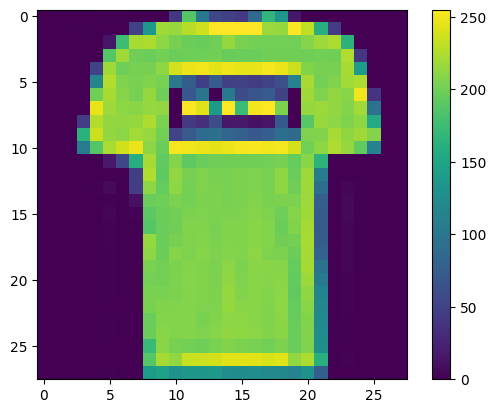

In [18]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()


**Data Preprocessing**
The last step before creating our model is to preprocess our data. This simply means applying some
prior transformations to our data before feeding it the model. In this case we will simply scale all our
greyscale pixel values (0-255) to be between 0 and 1. We can do this by dividing each value in the
training and testing sets by 255.0. We do this because smaller values will make it easier for the model
to process our values.

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0


**Building the Model**
We are going to use a keras sequential model with three different layers. This model represents a
feed-forward neural network (one that passes values from left to right).


In [ ]:
model = keras.Sequential([
keras.layers.Flatten(input_shape=(28, 28)), # input layer (1)
keras.layers.Dense(128, activation='relu'), # hidden layer (2)
keras.layers.Dense(10, activation='softmax') # output layer (3)
])

**Compile the Model**

The last step in building the model is to define the loss function, optimizer and metrics we would like
to track.


In [ ]:
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

**Training the Model**

In [ ]:
model.fit(train_images, train_labels, epochs=10) # we pass the data, labels and epochs

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4974 - accuracy: 0.8246
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3763 - accuracy: 0.8637
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3393 - accuracy: 0.8764
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3137 - accuracy: 0.8854
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2959 - accuracy: 0.8915
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2839 - accuracy: 0.8941
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2699 - accuracy: 0.9002
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2593 - accuracy: 0.9029
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2493 - accuracy: 0.9076
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.242

**Evaluating the Model**

We can evaluate easily using another built-in method from keras.


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3496 - accuracy: 0.8770
Test accuracy: 0.8769999742507935


**Making Predictions**
To make predictions we simply need to pass an array of data in the form we've specified in the input
layer to .predict() method.

In [ ]:
predictions = model.predict(test_images)


313/313 [==============================] - 0s 1ms/step


This method returns to us an array of predictions for each image we passed it. Let's have a look at the
predictions for image 1

In [ ]:
predictions[0]


array([2.2428366e-09, 4.3675601e-14, 8.7540024e-11, 2.3282296e-13,
       2.5123705e-09, 7.3024549e-04, 8.3368370e-09, 1.4693511e-03,
       1.3200917e-08, 9.9780041e-01], dtype=float32)

If we wan't to get the value with the highest score we can use a useful function from numpy called
argmax(). This simply returns the index of the maximium value from a numpy array.


In [ ]:
np.argmax(predictions[0])

9

And we can check if this is correct by looking at the value of the corresponding test label.

In [ ]:
test_labels[0]

9